In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [4]:
import numpy as np
import pandas as pd


In [5]:
anime_data = pd.read_csv('../input/anime-recommendations-database/anime.csv')
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
rating_data = pd.read_csv('../input/anime-recommendations-database/rating.csv')
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [7]:
# join the user_id with the anime_data using anime_id, then drop rating from the rating table
rating_data = rating_data.drop(['rating'], axis = 1)
all_data = pd.merge(anime_data, rating_data, on='anime_id')
all_data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278


In [8]:
# getting shape 
all_data.shape

(7813727, 8)

In [9]:
all_data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
user_id       int64
dtype: object

In [10]:
print(all_data.describe().to_markdown())

|       |        anime_id |      rating |          members |         user_id |
|:------|----------------:|------------:|-----------------:|----------------:|
| count |     7.81373e+06 | 7.81372e+06 |      7.81373e+06 |     7.81373e+06 |
| mean  |  8909.05        | 7.65313     | 178621           | 36728           |
| std   |  8883.92        | 0.673029    | 188176           | 20998           |
| min   |     1           | 1.67        |     29           |     1           |
| 25%   |  1240           | 7.27        |  44030           | 18974           |
| 50%   |  6213           | 7.68        | 110470           | 36791           |
| 75%   | 14093           | 8.13        | 244268           | 54757           |
| max   | 34519           | 9.5         |      1.01392e+06 | 73516           |


In [11]:
# how much is the missing data

print(all_data.isnull().sum().to_markdown())

|          |   0 |
|:---------|----:|
| anime_id |   0 |
| name     |   0 |
| genre    | 110 |
| type     |   4 |
| episodes |   0 |
| rating   |   6 |
| members  |   0 |
| user_id  |   0 |


In [12]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(all_data.rating.min()))
print('Maximum rating is: %d' %(all_data.rating.max()))

Minimum rating is: 1
Maximum rating is: 9


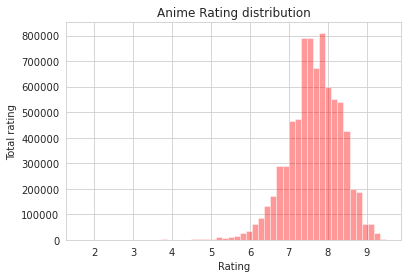

In [13]:
# Check the distribution of the rating
import seaborn as sns

with sns.axes_style('white'):
    g = sns.set_style('whitegrid') 
    g = sns.distplot(all_data['rating'], kde = False, color ='red', bins = 50)
    g.set(xlabel='Rating', ylabel='Total rating', title = 'Anime Rating distribution')

In [14]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",all_data.shape[0])
print("Total No of Users   :", len(np.unique(all_data.user_id)))
print("Total No of anime movies  :", len(np.unique(all_data.anime_id)))


Total data 
--------------------------------------------------

Total no of ratings : 7813727
Total No of Users   : 73515
Total No of anime movies  : 11197


In [15]:
#Analysis of rating given by the user 

no_of_rated_anime_per_user = all_data.groupby(by='user_id')['rating'].count().sort_values(ascending=False)

no_of_rated_anime_per_user.head()

user_id
48766    10226
42635     3747
53698     2905
57620     2702
59643     2633
Name: rating, dtype: int64

In [16]:
pd.set_option('precision', 2)
no_of_rated_anime_per_user.describe()

count    73515.00
mean       106.29
std        153.09
min          1.00
25%         18.00
50%         57.00
75%        136.00
max      10226.00
Name: rating, dtype: float64

In [17]:
quantiles = no_of_rated_anime_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

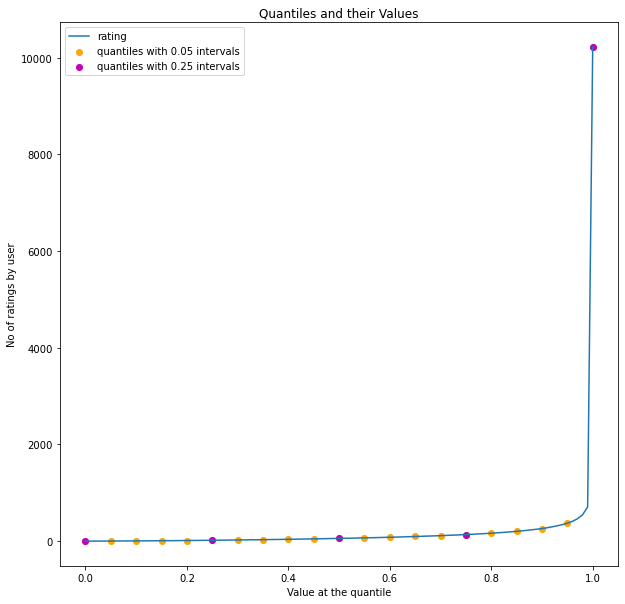

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [19]:
print('\n No of rated anime more than 1000 per user : {}\n'.format(sum(no_of_rated_anime_per_user >= 1000)) )


 No of rated anime more than 1000 per user : 238



In [20]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=all_data.groupby("anime_id").filter(lambda x:x['rating'].count() >=1000)

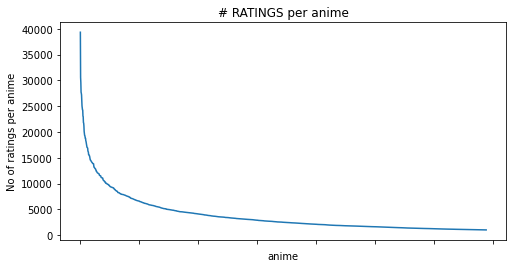

In [21]:
no_of_ratings_per_anime = new_df.groupby(by='anime_id')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_anime.values)
plt.title('# RATINGS per anime')
plt.xlabel('anime')
plt.ylabel('No of ratings per anime')
ax.set_xticklabels([])

plt.show()

In [22]:
#Average rating of the anime 

new_df.groupby('anime_id')['rating'].mean().head()

anime_id
1     8.82
5     8.40
6     8.32
7     7.36
15    8.08
Name: rating, dtype: float64

In [23]:
new_df.groupby('anime_id')['rating'].mean().sort_values(ascending=False).head(10)

anime_id
32281    9.37
5114     9.26
28977    9.25
9253     9.17
9969     9.16
32935    9.15
11061    9.13
15417    9.11
15335    9.10
4181     9.06
Name: rating, dtype: float64

In [24]:
new_df.groupby('anime_id')['rating'].count().sort_values(ascending=False).head(10)

anime_id
1535     39340
11757    30583
16498    29584
1575     27718
226      27506
6547     27183
20       25925
121      25032
5114     24574
4224     24283
Name: rating, dtype: int64

In [26]:
ratings_mean_count = pd.DataFrame(new_df.groupby('anime_id')['rating'].mean())
display(ratings_mean_count.head(10))

,rating
anime_id,
1,8.82
5,8.40
6,8.32
7,7.36
15,8.08
16,8.18
18,8.24
19,8.72
20,7.81


In [27]:
ratings_mean_count['rating_count'] = pd.DataFrame(new_df.groupby('anime_id')['rating'].count())
display(ratings_mean_count.head(10))

,rating,rating_count
anime_id,,
1,8.82,15509
5,8.40,6927
6,8.32,11077
7,7.36,2629
15,8.08,2424
16,8.18,3890
18,8.24,1911
19,8.72,4594
20,7.81,25925


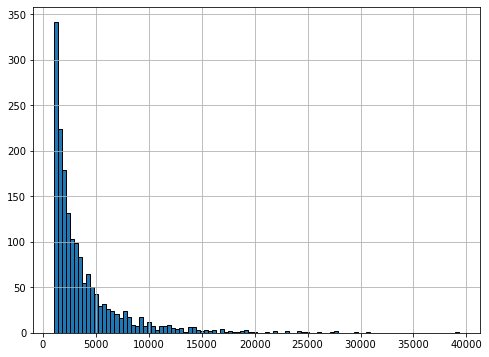

In [29]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_count'].hist(bins=100)

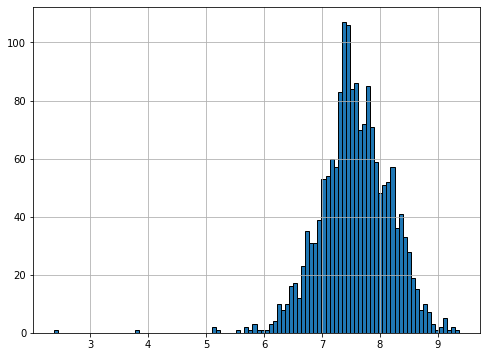

In [31]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=100)

<Figure size 576x432 with 0 Axes>

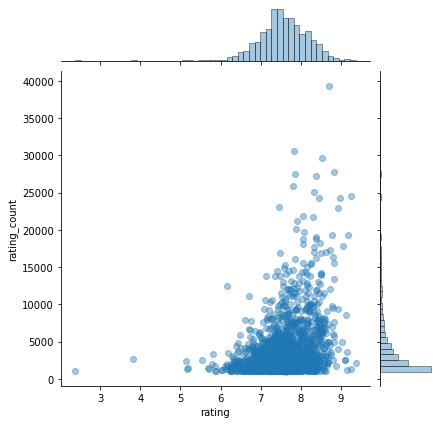

In [32]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_count', data=ratings_mean_count, alpha=0.4)

In [ ]:
popular_anime = pd.DataFrame(new_df.groupby('anime_id')['rating'].count())
most_popular = popular_anime.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar")